# Real Estate - Price Predictor

In [1]:
# To get the data 
# GOTO Index of /ml/machine-learning-databases/housing [UCI Machine Learning Dataset]

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading data from the csv file 
housing_data = pd.read_csv("data.csv")

In [4]:
# To print the top 10 entries of the dataset
housing_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
# To get the information about the dataset. It is useful to know if there are null values in the dataset.
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing_data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


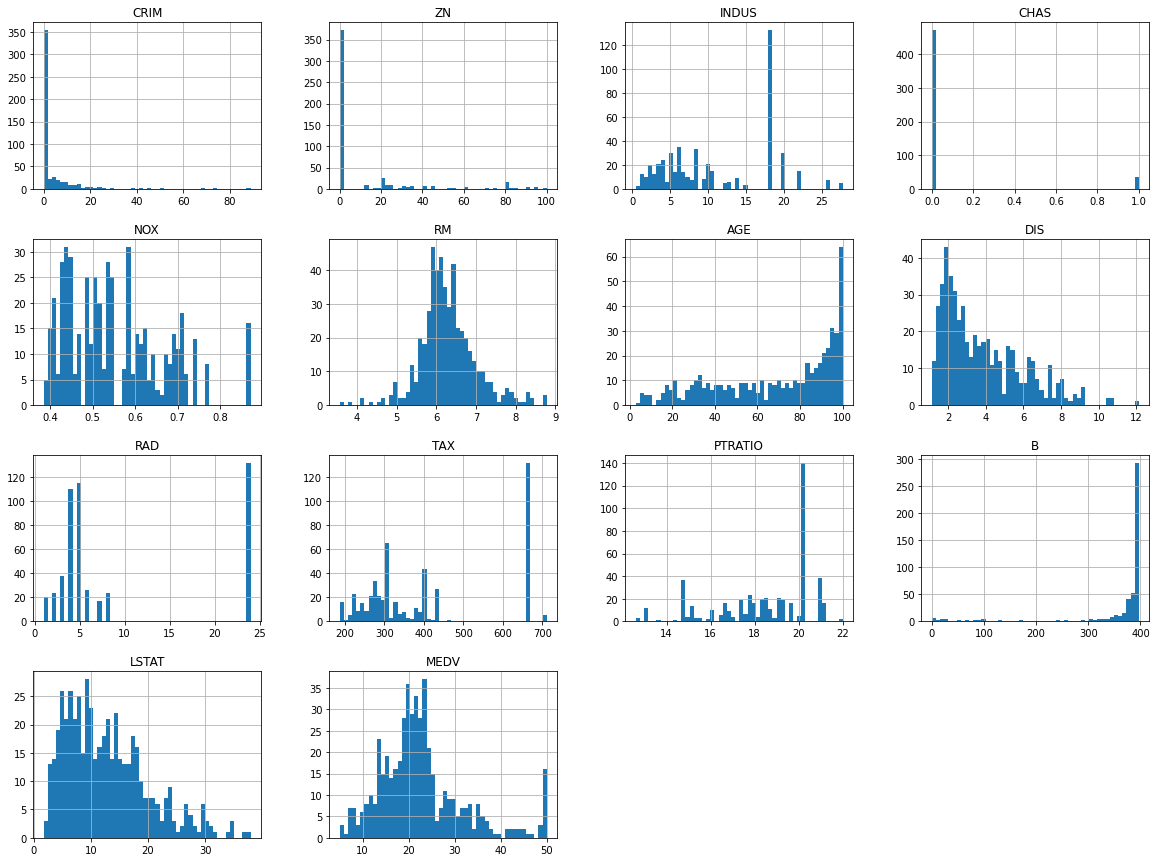

In [8]:
# To print the graph inside the notebook output matplotlib inline is used.
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins = 50, figsize=(20, 15))
plt.show()
# Jupyter Notebook does not require plt.show() for printing the histograms but if using .py file plt.show() is mandatory.
# With plt.show() Jupyter Notebook directly prints the graph without showing the array information.

## Train-Test Splitting (Through a function)
Data needs to be separated into training set and test set. Test set is to left untouched by the model.
This thing can also be directly done with sklearn module

In [9]:
# def split_test_train(data, testratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int (len(data) * testratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_test_train(housing_data, 0.2)
# print(f"Rows in training set: {len(train_set)} \n Rows in testing set: {len(test_set)}")

## Splitting through sklearn module

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
print(f"Rows in training set: {len(train_set)} \n Rows in testing set: {len(test_set)}")

Rows in training set: 404 
 Rows in testing set: 102


In [12]:
# Stratified Shuffle is used such that the data is evenly distributed according to the unevenly distributed variable.
# Stratified shuffle gives an equal distribution of the data according to a given variable. 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['CHAS']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
housing_data = strat_train_set.copy()
# This step is most important as it cuts out some of the data for testing purposes and trains the machine learning model with selected part of the dataset.

## Looking for correlations

In [16]:
corr_matrix = housing_data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

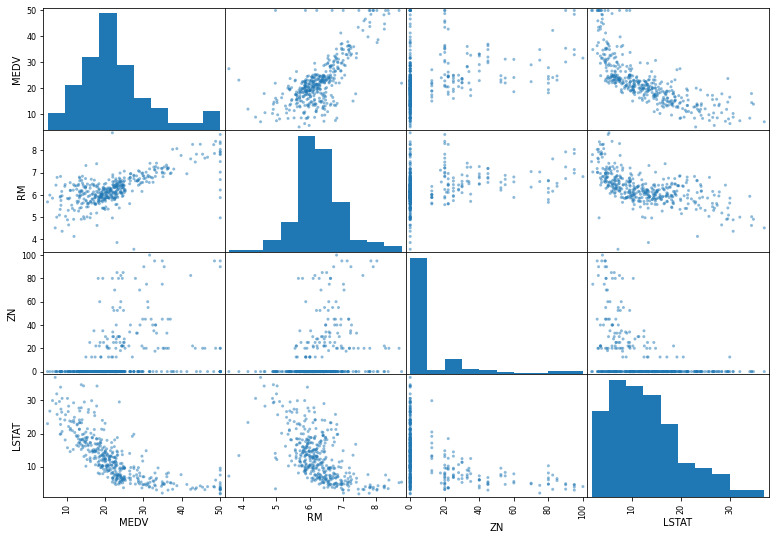

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing_data[attributes], figsize=(13, 9))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

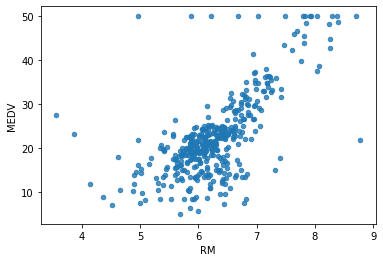

In [18]:
housing_data.plot(kind  = "scatter", x ='RM', y = 'MEDV', alpha =0.8)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

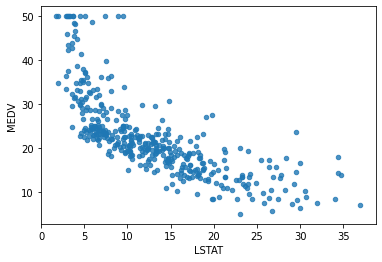

In [19]:
housing_data.plot(kind  = "scatter", x ='LSTAT', y = 'MEDV', alpha =0.8)

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

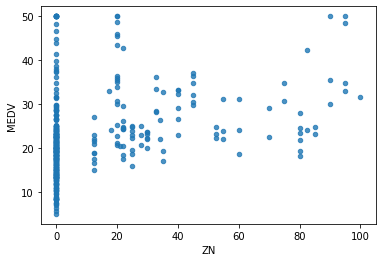

In [20]:
housing_data.plot(kind  = "scatter", x ='ZN', y = 'MEDV', alpha =0.8)

## Trying out Attribute combinations

In [21]:
housing_data['TAXRM'] = housing_data['TAX']/housing_data['RM']
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing_data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

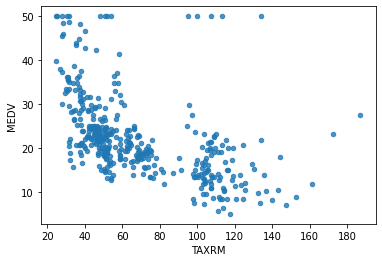

In [23]:
housing_data.plot(kind  = "scatter", x ='TAXRM', y = 'MEDV', alpha =0.8)

In [24]:
housing_data = strat_train_set.drop('MEDV', axis= 1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes 

In [25]:
# Most of the times the data will have missing values. In this case we have deleted some entries from the RM column 
# To take care of missing attributes, you have three options:
# 1 Get rid of the missing data points
# 2 Get rid of the whole attribute 
# 3 Set the value to some value(0, mean or median)

In [26]:
# Option 1: To Remove the missing data points 

# option1 = housing_data.dropna(subset=['RM'])
# option1.shape

# This will not change the original dataframe unless used inline 

In [27]:
# Option 2: To Remove the entire column

# housing_data.drop('RM', axis=1).shape

# This will not change the original dataframe

In [28]:
# Option 3: To fill the missing values with median or mode. We are using median 

# median = housing_data['RM'].median()
# housing_data['RM'].fillna(median)

# This will not change the original dataframe

The missing values problem can also be solved through SimpleImputer function from sklearn.impute module 

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing_data)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(housing_data)

In [32]:
housing_data_transformed = pd.DataFrame(X, columns=housing_data.columns)

In [33]:
housing_data_transformed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, there are three types of objects in sklearn library. 

1. Estimators - It estimates some parameter based on a dataset. Eg. Imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.

2. Transformers - transform method takes input and returns output on the learnings from the fit(). It also has a convenience function called fit_transform() which fits and then transforms. 

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives a score() function which will evaluate the predictions. 

## Feature Scaling 

Primarily, there are two types of feature scaling:

1. Max-Min Scaling (Normalization)
    (value - min)/(max - min)...... It brings down the scales to 0-1 range
    Sklearn provides a class called MinMaxScaler for this.

2. Standarization
    (value - mean)/std..... It gives covariance 1. Standarization does not get effect much if any of the values are changed in the dataset. Sklearn provides a class called StandardScaler for this. 

## Creating a Pipeline
Creating functions that can be used again and easily and can also be modified easily. 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
#     .... add as many as you want to add
    ('std_scaler', StandardScaler())  
])

In [35]:
housing_num_transformed = my_pipeline.fit_transform(housing_data_transformed)

In [36]:
housing_num_transformed

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [37]:
housing_num_transformed.shape

(404, 13)

## Selecting a desired model for this Real Estate Price Prediction
You can try out as many models as you want. 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# First: Linear Regression
# Second: DecisionTreeRegressor
# Third: Cross-validation on DecisionTreeRegressor
# Fourth: Cross-validation on Linear Regression
# Fifth: Random Forest Regressor
# Use more models

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_transformed, housing_labels)

RandomForestRegressor()

In [39]:
some_data = housing_data.iloc[:7]

In [40]:
some_labels = housing_labels.iloc[:7]

In [41]:
prepered_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepered_data)

array([22.423, 25.668, 16.507, 23.295, 23.88 , 17.087, 24.429])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0, 17.2, 24.4]

## Evaluating the model 

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_transformed)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [45]:
mse

1.5972252004950493

In [46]:
rmse

1.2638137522970105

## Using better evaluation technique: Cross Validation

In [47]:
# 1 2 3 4 5 6 7 8 9 10 
# Dividing the data set into several groups and then taking each group and testing with the others. 
#This checks ulitity, the more the better. For cost function the lower the better. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_transformed, housing_labels, scoring='neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([2.70722063, 2.81611221, 4.35449926, 2.44970092, 3.41143   ,
       2.55327585, 4.62446849, 3.34435535, 3.31158674, 3.51725327])

In [49]:
# Error for Decision Tree Regressor is less than the error for Linear Regression

In [50]:
def print_scores(scores):
    print("Scores are", scores)
    print("Mean is: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [51]:
print_scores(rmse_scores)

Scores are [2.70722063 2.81611221 4.35449926 2.44970092 3.41143    2.55327585
 4.62446849 3.34435535 3.31158674 3.51725327]
Mean is:  3.308990271981446
Standard Deviation:  0.6923319111791952


## Saving the model

In [52]:
from joblib import dump, load
dump(model, 'Real_Estate.joblib')

['Real_Estate.joblib']

## Testing the model on test data

In [53]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.511 11.95  25.955 21.997 18.11  14.794 20.01  14.464 31.627 42.501
 19.555 12.25  24.146 26.312 19.612 11.511 31.348 14.431 23.795 18.746
 20.37  18.321 18.027 21.841 18.076 31.27  15.787 33.177  9.135 33.436
 24.579 21.213 22.671 10.966 21.144 10.802 44.018 24.752 23.754 41.283
 23.895 30.473 20.463 21.035 19.308 33.303 44.825 20.189 20.112 21.795
 21.257 14.493 21.342 14.989 25.407 33.185 41.435 29.309 19.856 20.816
 47.383  9.676 19.349 25.691 14.747 33.268 20.569 17.522 18.937 34.255
 25.68  22.645 21.124 22.875 35.253 12.389 15.902 19.999 20.904 21.507
 22.685 20.734 14.03  22.924 21.107 21.628 14.426 21.404 21.608 23.534
 18.874 27.109  7.654 26.72  19.235 29.422 20.376 31.827 14.176 26.773
 21.428 20.29 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [54]:
final_rmse

2.9685066110756773

In [55]:
prepered_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49865392, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28660512,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13494109, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752],
       [ 1.29156014, -0.489831

## Using the Model

In [56]:
# This can also be done by creating a new file. That method is more preferred. 
from joblib import dump, load
import numpy as np
model = load('Real_Estate.joblib')
dummy_input = np.array([[-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0450661 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]] )
model.predict(dummy_input)

array([23.88])